### Introduction ###

I am researching whether national suicide rates are correlated with economic opportunity, political freedom, and military presence, using the Gapminder dataset.  The variables I am using to measure these attributes are: Suicide Rate (per 100,000 population), Employment Rate, Armed Forces Rate (size of active military in proportion to population), and Polity Score.

### Data Management and Visualization ###

The first section of code below reads in the dataset, converts columns that were read in as strings to a numeric datatype, and subsets the dataframe to include only the columns with useful metrics.  I also dealt with missing data by removing incomplete records.

For each variable, I visualized the distribution with a histogram, identified the outliers, and wrote a short summary of my observations.  Because suicide rate, employment rate, and armed forces rate are continuous quantitative variables rather than categorical, it made more sense to create histograms than frequency tables.  In histograms, variable value ranges (aggregated into bins) are indicated on the x-axis while the count of observations within each bin are reported on the y-axis.  Selecting the size of the bins in the histograms is an equivalent data management decision to grouping and binning in frequency tables.
For the purposes of this assignment, I did reclassify the armed forces rates into new bins, and produced an updated frequency table.  

Polity Score values were discrete rather than continuous.  I created both a histogram (using the existing bins) and a frequency table. 

### ANOVA ###

Please see the ANOVA section under each univariate analysis.


In [77]:
# Import packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

# Enable command results to be displayed in jupyter notebook

%matplotlib inline

# Read in data

df = pd.read_csv('gapminder.csv',low_memory=False)

#### Organizing Data ####

In [78]:
# View the first few rows of the dataframe

df.head(4)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92


In [79]:
# Get Dimensions of DataFrame

# There are 213 Rows, 16 columns

print(len(df))
print(len(df.columns))

213
16


In [80]:
# Confirm current data type of column 

df['armedforcesrate'].dtype

dtype('O')

In [81]:
# Convert the variables I want to keep to numeric

numCols = ['suicideper100th','employrate','armedforcesrate','polityscore']

for i in numCols:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [82]:
# Confirm data type conversion - now Float

df['armedforcesrate'].dtype

dtype('float64')

In [83]:
# Subset columns

keepCols = ['country','suicideper100th','employrate','armedforcesrate','polityscore']

df2 = df[keepCols]

df2.head()

,country,suicideper100th,employrate,armedforcesrate,polityscore
0,Afghanistan,6.684385,55.700001,0.569653,0
1,Albania,7.699330,51.400002,1.024736,9
2,Algeria,4.848770,50.500000,2.306817,2
3,Andorra,5.362179,NaN,NaN,NaN
4,Angola,14.554677,75.699997,1.461329,-2


##### Handling Missing Data #####

I dropped any countries that were missing a value for any of my variables. 

This left 152 countries to analyze.

In [84]:
# Drop countries with no values for any explanatory variables

df2 = df2.dropna(subset=['suicideper100th','employrate','armedforcesrate','polityscore'],how='any')

print(len(df2))

152


### Univariate Analysis ###

##### Suicide Rate #####

Most countries fall between 5 and 12 suicides per 100,000 population. I considered as outliers any country above 25 or below 1.5 per 100,000.  This distribution is unimodal and moderately right-skewed.

Four of the fivwe countries with the lowest reported rates are in the Middle East.

Four of the seven countries with the highest rates are former Soviet republics (or in the case of Belarus, in the same region).

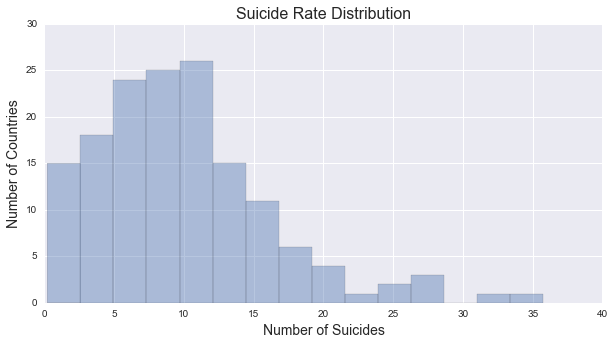

In [85]:
# Plot histogram to visualize distribution

# Suicides per 100K population

plt.figure(figsize=(10,5))
ax = sns.distplot(df2['suicideper100th'],kde=False)
plt.title('Suicide Rate Distribution',fontsize=16)
plt.xlabel('Number of Suicides',fontsize=14)
plt.ylabel('Number of Countries',fontsize=14)

In [86]:
# Identify Upper Extremes

df2.loc[(df2['suicideper100th']>=25),('country','suicideper100th')].sort_values(by='suicideper100th',ascending=False)

,country,suicideper100th
80,Guyana,35.752872
110,Lithuania,33.341860
180,Sri Lanka,28.104046
159,Russia,27.874160
16,Belarus,26.874690
103,Laos,26.219198
96,Kazakhstan,25.404600


In [87]:
# Identify Lower Extremes

df2.loc[(df2['suicideper100th']<=1.5),('country','suicideper100th')].sort_values(by='suicideper100th')

,country,suicideper100th
95,Jordan,0.201449
186,Syria,0.523528
11,Azerbaijan,1.380965
201,United Arab Emirates,1.392951
101,Kuwait,1.498057


##### Employment Rate  #####

The distribution of employment rates centers around 60%, with a high in the 80s and a low in the 30s.  It's important to note that the age cutoff is 15, which means that full-time high school and university-level students count as a negative in this metric.  So many high-performing economies are actually in the middle.

African countries are found at the high end of the range, while Middle Eastern countries are at the low end.

Two countries remaining in the dataset did not have employment rates reported.


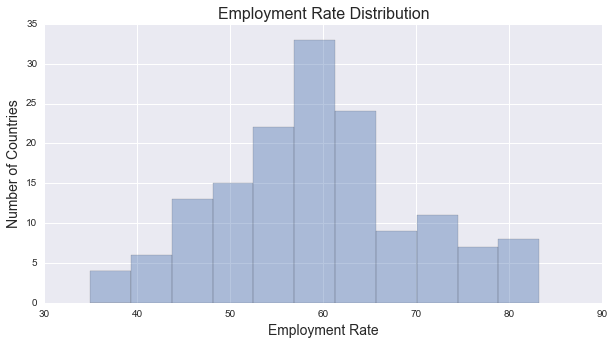

In [88]:
# Employment Rate Distribution

plt.figure(figsize=(10,5))
ax = sns.distplot(df2['employrate'],kde=False)
plt.title('Employment Rate Distribution',fontsize=16)
plt.xlabel('Employment Rate', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

In [89]:
# Identify Upper Extremes

df2.loc[(df2['employrate']>=80),('country','employrate')].sort_values(by='employrate',ascending=False)


,country,employrate
29,Burundi,83.199997
199,Uganda,83.199997
114,Madagascar,83.000000
78,Guinea,81.500000
28,Burkina Faso,81.300003
60,Ethiopia,80.699997


In [90]:
# Identify lower Extremes

df2.loc[(df2['employrate']<=40),('country','employrate')].sort_values(by='employrate')


,country,employrate
113,"Macedonia, FYR",34.900002
89,Iraq,37.400002
95,Jordan,38.900002
210,"Yemen, Rep.",39.000000


#### Employment Rate ANOVA ####

I broke the employment rate values into five quantiles, each representing approximately 20% of dataset, the and assigned them to a new column in the dataframe.

The mean suicide rates by employment rate quantile ranged from 7.9 to 12.0.  However, with a p-value of 0.129, we must accept the null hypothesis which states that suicide rate is not associated with employment rate.  


In [91]:
# Reclassify Employment Rate Into Quantiles

df2['employratequantiles'] = pd.qcut(df2['employrate'],labels=['Q1','Q2','Q3','Q4','Q5'],q=5)


In [92]:
df2.head()

,country,suicideper100th,employrate,armedforcesrate,polityscore,employratequantiles
0,Afghanistan,6.684385,55.700001,0.569653,0,Q2
1,Albania,7.699330,51.400002,1.024736,9,Q2
2,Algeria,4.848770,50.500000,2.306817,2,Q1
4,Angola,14.554677,75.699997,1.461329,-2,Q5
6,Argentina,7.765584,58.400002,0.560987,8,Q3


C:\Users\garymiller01\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


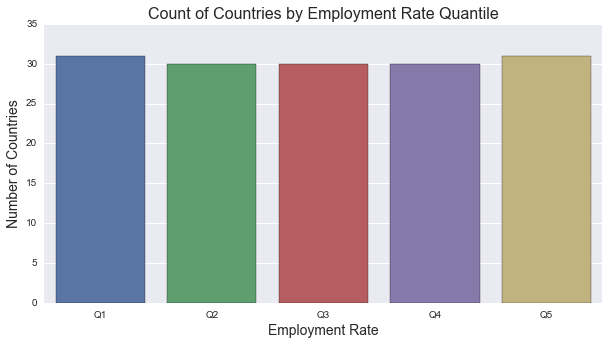

In [93]:
# Visualize Employment Rate Quantile Distribution

plt.figure(figsize=(10,5))
ax = sns.countplot(x='employratequantiles',data=df2)
plt.title('Count of Countries by Employment Rate Quantile',fontsize=16)
plt.xlabel('Employment Rate', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)


In [94]:
# View Mean Suicide Rates by Employment Rate Quantile

df2['suicideper100th'].groupby(df2['employratequantiles']).mean()

employratequantiles
Q1     7.931655
Q2    12.017755
Q3    10.690461
Q4     9.197720
Q5     9.880443
Name: suicideper100th, dtype: float64

In [95]:
#  ANOVA

modelemp = smf.ols(formula='suicideper100th ~ employratequantiles',data=df2)
resultsemp = modelemp.fit()
print(resultsemp.summary())


                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.814
Date:                Sun, 08 May 2016   Prob (F-statistic):              0.129
Time:                        19:41:18   Log-Likelihood:                -492.92
No. Observations:                 152   AIC:                             995.8
Df Residuals:                     147   BIC:                             1011.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

##### Armed Forces Rate #####

The vast majority of countries had armed forces rates of less than 1% of population.  This distribution is heavily right-skewed.

Outliers on the high side (above 6%) are North Korea, Eritrea, Iraq, and Singapore. 

On the low end are Haiti (which disbanded its military in 1995) and a number of African countries..

To better understand the cluster under 1%, I reclassified the values into different bins.  Those values are fairly evenly broken up by tenths of a percent.  That range of the distribution is actually rather uniform.

In [96]:
df2['armedforcesrate'].describe()

count    152.000000
mean       1.426534
std        1.697106
min        0.000000
25%        0.467746
50%        0.931293
75%        1.611383
max       10.638521
Name: armedforcesrate, dtype: float64

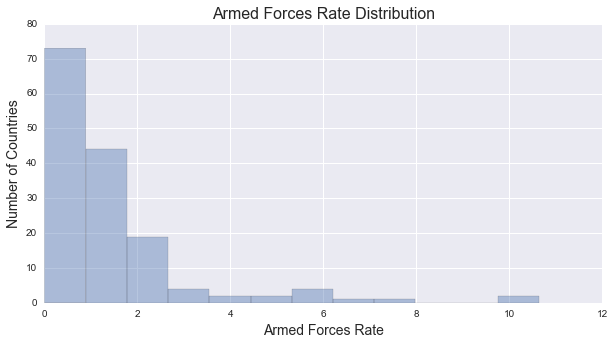

In [97]:
# Visualize distribution with histogram

plt.figure(figsize=(10,5))
ax = sns.distplot(df2['armedforcesrate'],kde=False,bins=12)
plt.title('Armed Forces Rate Distribution',fontsize=16)
plt.xlabel('Armed Forces Rate', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

In [98]:
# Identify higher outliers

df2.loc[(df2['armedforcesrate']>=6.0),('country','armedforcesrate')].sort_values(by='armedforcesrate',ascending=False)

,country,armedforcesrate
99,"Korea, Dem. Rep.",10.638521
58,Eritrea,9.820127
89,Iraq,7.737913
173,Singapore,6.394936


In [99]:
# Identify lower outliers

df2.loc[(df2['armedforcesrate']<=0.15),('country','armedforcesrate')].sort_values(by='armedforcesrate')

,country,armedforcesrate
81,Haiti,0.000000
131,Mozambique,0.102269
149,Papua New Guinea,0.105115
115,Malawi,0.114592
107,Liberia,0.129953
70,Ghana,0.131487
67,Gambia,0.134591
189,Tanzania,0.134730
35,Central African Rep.,0.148659


#### Armed Forced Rate ANOVA ####

I reclassified the continuous armed forces rate values into bins, which could be used as categories for ANOVA.

The mean suicide rates bins range from 3.4 to 17.0.

ANOVA yields a p-value of .299, far greater than .05. So there is not enough evidence to reject the null hypothesis which states that armed forces rate and suicide rate are not correlated.

In [158]:
bins=[0,1,2,3,4,5,6,7,8,9,10,11]

df2['armedforcesratebins'] = pd.cut(df2['armedforcesrate'],bins)

In [159]:
# New Frequency Table - by count

df2['armedforcesratebins'].value_counts().sort_index()

(0, 1]      81
(1, 2]      41
(2, 3]      14
(3, 4]       4
(4, 5]       2
(5, 6]       5
(6, 7]       1
(7, 8]       1
(8, 9]       0
(9, 10]      1
(10, 11]     1
dtype: int64

In [160]:
# New Frequency Table - by percentage

df2['armedforcesratebins'].value_counts(normalize=True).sort_index()

(0, 1]      0.532895
(1, 2]      0.269737
(2, 3]      0.092105
(3, 4]      0.026316
(4, 5]      0.013158
(5, 6]      0.032895
(6, 7]      0.006579
(7, 8]      0.006579
(8, 9]      0.000000
(9, 10]     0.006579
(10, 11]    0.006579
dtype: float64

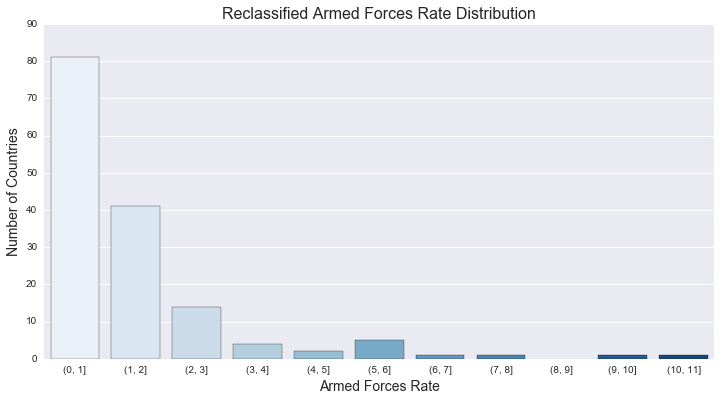

In [161]:
# New plot

plt.figure(figsize=(12,6))
ax = sns.countplot(x='armedforcesratebins',data=df2,palette='Blues')
plt.title('Reclassified Armed Forces Rate Distribution',fontsize=16)
plt.xlabel('Armed Forces Rate',fontsize=14)
plt.ylabel('Number of Countries',fontsize=14)

In [162]:
# View Suicide Rate Means by Armed Forces Rate Bin

df2['suicideper100th'].groupby(df2['armedforcesratebins']).mean()

armedforcesratebins
(0, 1]      10.558417
(1, 2]      10.174615
(2, 3]       8.044948
(3, 4]       9.039581
(4, 5]      14.967969
(5, 6]       3.382025
(6, 7]       9.127511
(7, 8]      17.032646
(8, 9]            NaN
(9, 10]      8.913363
(10, 11]     4.735673
Name: suicideper100th, dtype: float64

In [163]:
# ANOVA

modelarmed = smf.ols(formula='suicideper100th ~ C(armedforcesratebins)',data=df2)
resultsarmed = modelarmed.fit()
print(resultsarmed.summary())


                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.201
Date:                Sun, 08 May 2016   Prob (F-statistic):              0.299
Time:                        21:04:36   Log-Likelihood:                -487.35
No. Observations:                 151   AIC:                             994.7
Df Residuals:                     141   BIC:                             1025.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Inte

#### Polity Scores ####

GapMinder classified each country's political freedom on a scale of -10 (autocracy) to +10 (democracy).  For more details, see the <a href="http://www.systemicpeace.org/polityproject.html" target="_blank">Polity IV Project</a> website.

Thirty-two countries were given the highest possible score, including much of Europe and North America, while 46 countries received negative scores.  This distribution is heavily left-skewed.

Countries with low scores are not limited to a particular geographic region. 

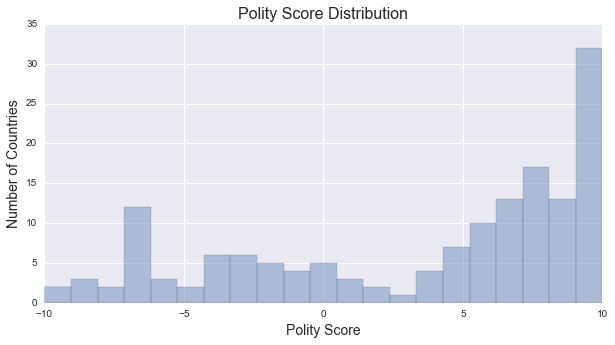

In [106]:
# Polity Score distribution

plt.figure(figsize=(10,5))
ax = sns.distplot(df2['polityscore'],bins=21,kde=False)
plt.title('Polity Score Distribution',fontsize=16)
plt.xlabel('Polity Score',fontsize=14)
plt.ylabel('Number of Countries',fontsize=14)

In [107]:
# Frequency Table for Polity Scores

df2['polityscore'].value_counts(dropna=False).sort_index(ascending=False)

 10    32
 9     13
 8     17
 7     13
 6     10
 5      7
 4      4
 3      1
 2      2
 1      3
 0      5
-1      4
-2      5
-3      6
-4      6
-5      2
-6      3
-7     12
-8      2
-9      3
-10     2
Name: polityscore, dtype: int64

In [108]:
# Count scores less than zero

df2.loc[df2['polityscore']<0,['country']].count()

country    45
dtype: int64

In [109]:
# Highest-ranking countries

df2.loc[(df2['polityscore']>=9.1),('country','polityscore')].sort_values(by='country',ascending=True)

,country,polityscore
9,Australia,10
10,Austria,10
32,Canada,10
37,Chile,10
44,Costa Rica,10
48,Cyprus,10
50,Denmark,10
63,Finland,10
69,Germany,10
72,Greece,10


In [110]:
# Identify lower outliers

df2.loc[(df2['polityscore']<=-7),('country','polityscore')].sort_values(by=['polityscore','country'],ascending=True)

,country,polityscore
156,Qatar,-10
167,Saudi Arabia,-10
99,"Korea, Dem. Rep.",-9
197,Turkmenistan,-9
205,Uzbekistan,-9
145,Oman,-8
201,United Arab Emirates,-8
11,Azerbaijan,-7
13,Bahrain,-7
16,Belarus,-7


#### Polity Score ANOVA ####

The discrete polity score values inherently work as categories for ANOVA, so there was no need to reclassify them.

The mean suicide rates for each of the polity scores ranged from about 4.5 to 14.3 per 100,000 population.

With a p-value of .0457, which is less than .05, ANOVA tells us that we can say with 95% certainty that the difference between means can be attributed to the Polity Score and not to random chance.  

However, the Tukey HSD post hoc test does not calculate the difference in the mean between any two categories to be statistically significant, and instead indicates that we should still accept the null hypothesis: that there is no association between the variables.  

In [117]:
# View Mean Suicide Rate by Polity Score

df2['suicideper100th'].groupby(df2['polityscore']).mean()

polityscore
-10     4.458629
-9      7.388721
-8      2.554845
-7      9.971015
-6     12.543004
-5      8.289253
-4      6.709083
-3      5.190980
-2      9.022800
-1     11.423137
 0     11.601318
 1     11.284163
 2      4.904921
 3      7.745065
 4     14.327403
 5      9.491012
 6     13.292073
 7      8.312363
 8      9.565543
 9     10.713958
 10    11.282987
Name: suicideper100th, dtype: float64

In [111]:
# ANOVA

modelpolity = smf.ols(formula='suicideper100th ~ polityscore',data=df2)
resultspolity = modelpolity.fit()
print(resultspolity.summary())



                            OLS Regression Results                            
Dep. Variable:        suicideper100th   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     4.060
Date:                Sun, 08 May 2016   Prob (F-statistic):             0.0457
Time:                        19:41:22   Log-Likelihood:                -494.55
No. Observations:                 152   AIC:                             993.1
Df Residuals:                     150   BIC:                             999.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       9.3356      0.590     15.813      

In [119]:
# Post Hoc Test

mcPolity = multi.MultiComparison(df2['suicideper100th'],df2['polityscore'])
resultPolityTukey = mcPolity.tukeyhsd()
print(resultPolityTukey.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
-10.0   -9.0   2.9301  -18.2937 24.1539 False 
-10.0   -8.0  -1.9038  -25.1533 21.3457 False 
-10.0   -7.0   5.5124  -12.2447 23.2695 False 
-10.0   -6.0   8.0844  -13.1394 29.3082 False 
-10.0   -5.0   3.8306  -19.4189 27.0802 False 
-10.0   -4.0   2.2505  -16.7327 21.2336 False 
-10.0   -3.0   0.7324  -18.2508 19.7155 False 
-10.0   -2.0   4.5642  -14.8878 24.0161 False 
-10.0   -1.0   6.9645  -13.1702 27.0992 False 
-10.0   0.0    7.1427  -12.3093 26.5946 False 
-10.0   1.0    6.8255  -14.3983 28.0494 False 
-10.0   2.0    0.4463  -22.8032 23.6958 False 
-10.0   3.0    3.2864  -25.1883 31.7612 False 
-10.0   4.0    9.8688  -10.2659 30.0035 False 
-10.0   5.0    5.0324  -13.6087 23.6735 False 
-10.0   6.0    8.8334  -9.1756  26.8425 False 
-10.0   7.0    3.8537  -13.8056  21.513 False 
-10.0   8.0    5.1069  -12.2732  22.487 False 
-10.0   9

### Multivariate Analysis ###

#### Suicide Rate vs. Employment Rate ####

The data does not show a significant relationship between suicide rate and employment rate, which contradicts my hypothesis.  As mentioned earlier, the use of 15 as the age cutoff for the employment rate may be a factor.


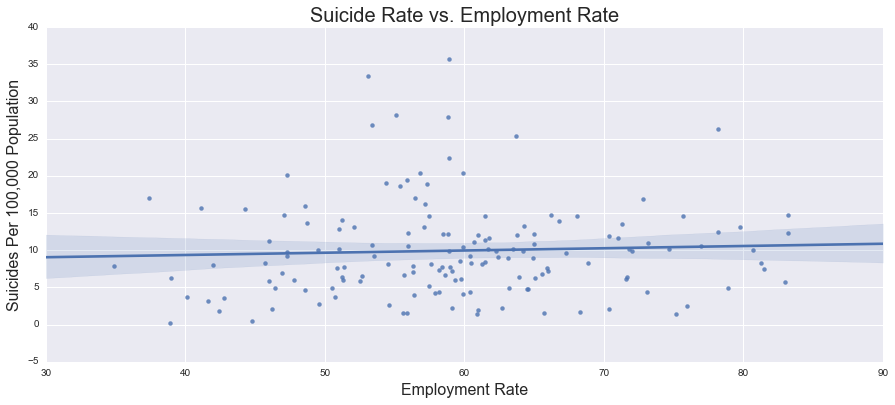

In [112]:
plt.figure(figsize=(15,6))
ax = sns.regplot(x='employrate',y='suicideper100th',data=df2)
plt.title('Suicide Rate vs. Employment Rate',fontsize=20)
plt.xlabel('Employment Rate',fontsize=16)
plt.ylabel('Suicides Per 100,000 Population',fontsize=16)

###  Suicide Rate vs. Armed Forces Rate ###

The data shows a slightly negative correlation; the relatively few countries with disproportionately high armed forces rates have somewhat lower suicide rates.  This is not a very robust prediction; the slope of the regression line is heavily influenced by a small number of outliers.  The wide confidence interval illustrates this considerable uncertainty.

My hypothesis was that we would see no correlation.  Yet of the three variables I looked at, this appears to be the strongest.

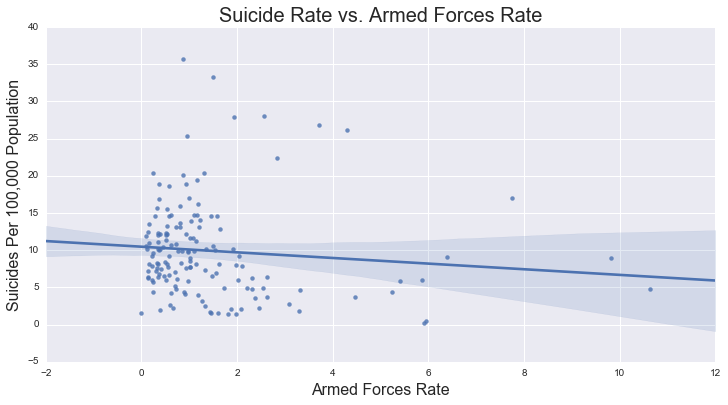

In [113]:
plt.figure(figsize=(12,6))
ax = sns.regplot(x='armedforcesrate',y='suicideper100th',data=df2)
plt.title('Suicide Rate vs. Armed Forces Rate',fontsize=20)
plt.xlabel('Armed Forces Rate',fontsize=16)
plt.ylabel('Suicides Per 100,000 Population',fontsize=16)

### Suicide Rate vs. Polity Score ###

My hypothesis was that as political freedom increased, suicide rate would decrease.  This plot does not appear to show a significant correlation between these two variables.

The univariate analysis showed that there were relatively few countries granted scores that were not 9 or 10.  So other individual attributes of each of these countries may play a more important role.


In [114]:
# Sort df by Polity Rate

df2 = df2.sort_values(by='polityscore',ascending=True)

df2.head()

,country,suicideper100th,employrate,armedforcesrate,polityscore,employratequantiles,armedforcesratebins
156,Qatar,2.515721,76.000000,1.334236,-10,Q5,"(1, 10.639]"
167,Saudi Arabia,6.401538,51.200001,2.618296,-10,Q2,"(1, 10.639]"
205,Uzbekistan,5.213720,57.500000,0.709630,-9,Q3,"(0.6, 0.8]"
99,"Korea, Dem. Rep.",4.735673,64.599998,10.638521,-9,Q4,NaN
197,Turkmenistan,12.216769,58.500000,0.931417,-9,Q3,"(0.8, 1]"


C:\Users\garymiller01\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


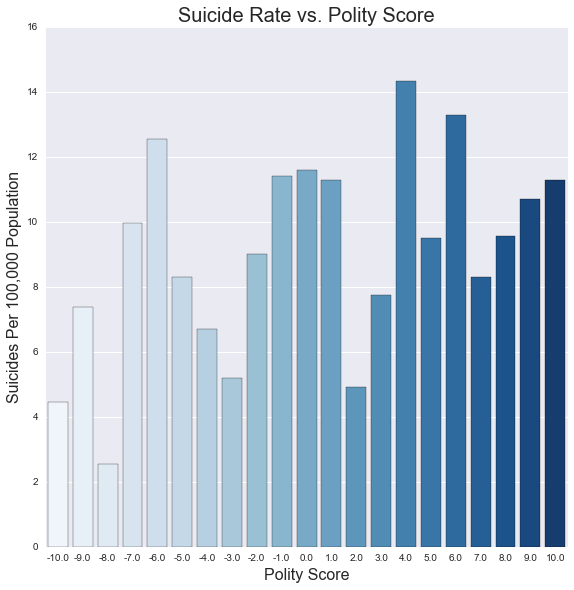

In [115]:
# Plot Suicide Rate vs Polity Score

plt.figure(figsize=(20,10))
ax = sns.factorplot(x='polityscore',y='suicideper100th',kind='bar',ci=None,data=df2,palette='Blues',
                   size=8,aspect=1)
plt.title('Suicide Rate vs. Polity Score',fontsize=20)
plt.xlabel('Polity Score',fontsize=16)
plt.ylabel('Suicides Per 100,000 Population',fontsize=16)
plt.show()